In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('df_with_3_metrics.tsv', sep='\t')
df.head(5)

,question,contexts,answer,ground_truths,answer_relevancy,context_precision,faithfulness
0,Как создать пользовательский справочник в Aimy...,['Как добавить ChatGPT в бота из конструктора'...,Чтобы создать пользовательский справочник в Ai...,['- Aimylogic предоставляет возможность создав...,1.000000,0.476190,1.000000
1,Какие фразы и состояния активируются у бота пр...,['От опции Любая другая фраза создайте экран и...,"Бот активирует состояния ""Привет"" и ""Пока"" при...",['На сообщения Привет и Пока бот будет отвечат...,0.930802,0.100000,1.000000
2,Какое действие позволяет боту запросить число ...,['Метод возвращает целочисленные значения от 0...,"Действие, которое позволяет боту запросить чис...",['- Действие InputNumber позволяет боту запрос...,0.974482,0.625000,0.500000
3,Какие данные бот может использовать из ввода п...,['Рекомендуется использовать интеграционные те...,Бот в Aimylogic может использовать следующие д...,"['- Это значит, что бот, созданный на Aimylogi...",0.988029,0.475000,0.714286
4,Какие атрибуты можно использовать с тегом &lt;...,['Вы также можете обозначить словесное ударени...,"Атрибуты, которые можно использовать с тегом &...",['&lt;style> Изменяет манеру (стиль) речи дикт...,0.991829,0.611111,0.500000


In [31]:
print(f'Answer relevancy: {df.answer_relevancy.mean():.2f}')
print(f'Context precision: {df.context_precision.mean():.2f}')
print(f'Faithfulness: {df.faithfulness.mean():.2f}')

Answer relevancy: 0.93
Context precision: 0.55
Faithfulness: 0.77


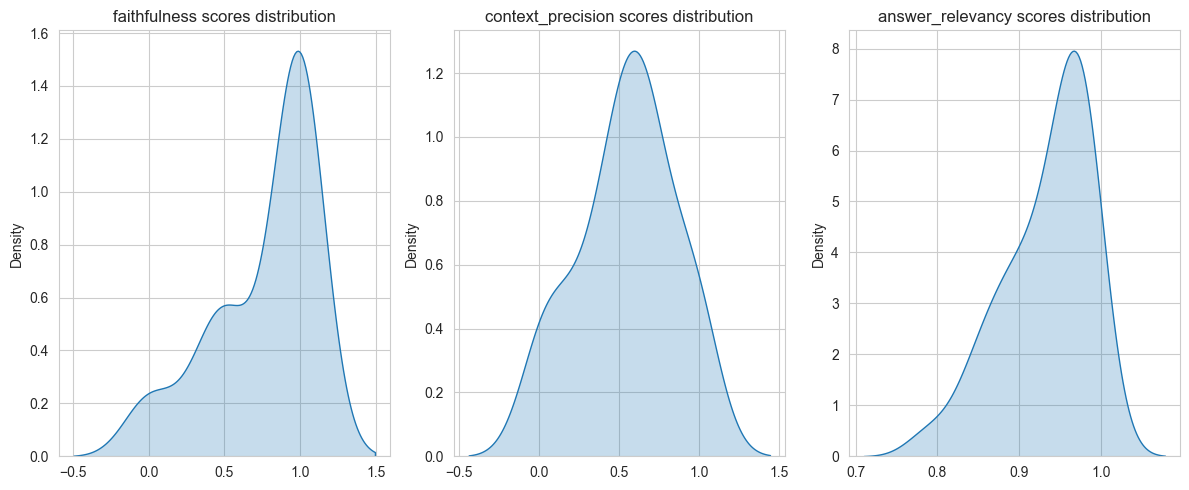

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analysis(zephyr_df):
  sns.set_style("whitegrid")
  fig, axs = plt.subplots(1,3, figsize=(12, 5))
  for i,col in enumerate(zephyr_df.columns):
    sns.kdeplot(data=[zephyr_df[col].values],legend=False,ax=axs[i],fill=True)
    axs[i].set_title(f'{col} scores distribution')
  plt.tight_layout()
  plt.show()

# result_zephyr_df = df.to_pandas()
analysis(
    df[['faithfulness', 'context_precision', 'answer_relevancy']]
    ) 